# Computing distances


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
sheet_id = '13n9SfqHIyzPHXzdPK0zqRE3gGfwkwe2vb9_ZjYYRpr8'
sheet_name = 'DS015'
url =  f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

df = pd.read_csv(url, index_col='student', nrows=13)
df.drop(['age','favorite_color'], axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Agustín,6,6,9,8,9,6,10,8,7
Anna,7,5,8,10,5,5,7,9,1
Christopher,9,5,10,10,5,8,8,8,8
Fabian,9,5,9,7,3,5,8,3,4
Hülya,10,10,8,3,8,5,10,10,0
Joldon,6,6,9,9,4,5,10,7,8
Karolina,9,2,10,0,7,5,8,8,1
Lisardo,8,9,2,6,6,7,10,1,9
Nessa,9,9,6,3,1,8,3,5,5


### Using scikitLearn `pairwise_distances`

In [7]:
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
eucl = pd.DataFrame(pairwise_distances(df), 
                    index=df.index, 
                    columns=df.index)
eucl

student,Agustín,Anna,Christopher,Fabian,Hülya,Joldon,Karolina,Lisardo,Nessa,Patrick,Simge,Sri Saleela,Joan
student,,,,,,,,,,,,,
Agustín,0.000000,8.366600,6.324555,9.273618,10.630146,5.385165,11.618950,11.357817,13.490738,9.848858,5.916080,15.099669,11.618950
Anna,8.366600,0.000000,8.246211,8.000000,10.148892,8.185353,11.090537,14.525839,12.083046,12.529964,8.888194,14.142136,13.304135
Christopher,6.324555,8.246211,0.000000,8.000000,13.000000,5.196152,13.076697,12.369317,11.832160,12.845233,6.855655,16.492423,13.379088
Fabian,9.273618,8.000000,8.000000,0.000000,11.704700,7.141428,10.440307,10.630146,9.165151,9.000000,11.357817,14.000000,12.529964
Hülya,10.630146,10.148892,13.000000,11.704700,0.000000,12.569805,9.380832,14.832397,12.767145,11.575837,11.135529,10.908712,15.620499
Joldon,5.385165,8.185353,5.196152,7.141428,12.569805,0.000000,13.038405,10.770330,11.958261,11.489125,8.944272,16.462078,11.135529
Karolina,11.618950,11.090537,13.076697,10.440307,9.380832,13.038405,0.000000,16.492423,13.000000,12.083046,13.038405,11.618950,10.583005
Lisardo,11.357817,14.525839,12.369317,10.630146,14.832397,10.770330,16.492423,0.000000,11.532563,11.135529,12.961481,13.379088,17.204651
Nessa,13.490738,12.083046,11.832160,9.165151,12.767145,11.958261,13.000000,11.532563,0.000000,13.892444,14.933185,12.083046,15.905974


**Challenge:** Explore the documentation of scikit-learn's pairwise distances function and create a dataframe like the one above, but using Manhattan distances.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

In [ ]:
# your code here

We can visualize the distances with a heatmap:

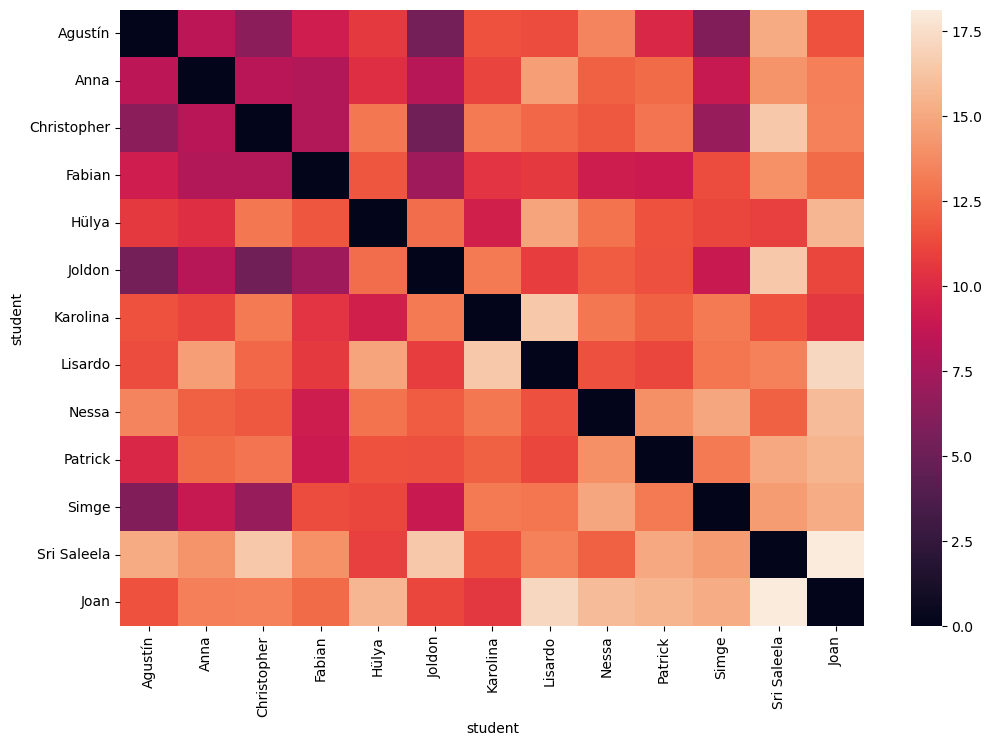

In [8]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.heatmap(eucl);

### Data scaling

The variable "age" is at a larger scale compared to the food ratings. That gives it a larger weight when computing similarities between students.

We'll scale the data manually first, so that we understand the transformation, and later on we'll us Scikit-Learn.

Working with variables with the same range: 

In [10]:
df = pd.read_csv(url, index_col='student',nrows=13)
df.drop('favorite_color', axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Agustín,6,6,9,8,9,6,10,8,7,33
Anna,7,5,8,10,5,5,7,9,1,35
Christopher,9,5,10,10,5,8,8,8,8,37
Fabian,9,5,9,7,3,5,8,3,4,42
Hülya,10,10,8,3,8,5,10,10,0,32
Joldon,6,6,9,9,4,5,10,7,8,8
Karolina,9,2,10,0,7,5,8,8,1,32
Lisardo,8,9,2,6,6,7,10,1,9,25
Nessa,9,9,6,3,1,8,3,5,5,36


#### Min and Max Scaling

In that case we will use a normalization of minimum and maximum: 


x' = x - min(x)/{max(x) - min(x)}

If we want to normalize the column broccoli, I will take the maximum and minimum value of that column, and then I will look at each individual value to know how for it is for this two values. 

In [14]:
def min_max_scaling(col): 
    min_col = min(col)
    max_col = max(col)
    norm_val = []    
    for val in col: 
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

In [15]:
pd.DataFrame({
    'original': df.iloc[:,0], 
    'min_max_scaling': min_max_scaling(df.iloc[:,0])
})

,original,min_max_scaling
student,,
Agustín,6,0.333333
Anna,7,0.500000
Christopher,9,0.833333
Fabian,9,0.833333
Hülya,10,1.000000
Joldon,6,0.333333
Karolina,9,0.833333
Lisardo,8,0.666667
Nessa,9,0.833333


In [13]:
# normalise all the columns on a dataset
df_norm = df.apply(min_max_scaling, axis=0).copy()
df_norm

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Agustín,0.333333,0.6,0.9,0.8,0.888889,0.666667,1.000000,0.8,0.777778,0.3125
Anna,0.500000,0.5,0.8,1.0,0.444444,0.555556,0.571429,0.9,0.111111,0.3375
Christopher,0.833333,0.5,1.0,1.0,0.444444,0.888889,0.714286,0.8,0.888889,0.3625
Fabian,0.833333,0.5,0.9,0.7,0.222222,0.555556,0.714286,0.3,0.444444,0.4250
Hülya,1.000000,1.0,0.8,0.3,0.777778,0.555556,1.000000,1.0,0.000000,0.3000
Joldon,0.333333,0.6,0.9,0.9,0.333333,0.555556,1.000000,0.7,0.888889,0.0000
Karolina,0.833333,0.2,1.0,0.0,0.666667,0.555556,0.714286,0.8,0.111111,0.3000
Lisardo,0.666667,0.9,0.2,0.6,0.555556,0.777778,1.000000,0.1,1.000000,0.2125
Nessa,0.833333,0.9,0.6,0.3,0.000000,0.888889,0.000000,0.5,0.555556,0.3500


#### Range Scaling

When we normalise the ratings, we are normalising the values between the minimum and maximum of each column, which should be 0 and 10. 
But, what happens when no one has given a rate of 0 or 10 to a food?

With min/max scaling the minumum and maximum of a column determine the range of that column. This can sometimes lead to obscure results in data. For example, if the lowest score for broccolli was an 8 and the highest was a 9, when we min/max scale broccoli, the 8 will become a 0, and the 9 will become a 1. The 0 and 1 will lead us to believe that these scores were very different, when in reality they were quite similar. In cases where it is appropriate, we can determine the range of our scaling: we can choose 1-10, 1-100, or even 7-99 if we wish to.

##### CHALLENGE: apply a range scaling on your data

In [ ]:
# your code here

### Scaling with scikit learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# What does it mean fit_transform?
df_sk_pre = MinMaxScaler().fit_transform(df)
pd.DataFrame(df_sk_pre, columns=df.columns, index=df.index)

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Akbar,0.7,0.000,0.5,0.1,0.3,0.4,0.714286,0.777778,0.7,0.081967
Andreas,0.7,0.875,0.7,0.0,0.7,0.3,0.000000,0.444444,0.7,0.114754
Dónal,0.8,0.750,0.8,0.5,0.1,0.5,0.714286,1.000000,1.0,0.131148
Hana,0.2,1.000,0.8,0.8,0.0,0.7,0.857143,0.777778,0.7,0.065574
Konstantinos,0.7,0.875,0.1,1.0,1.0,0.8,1.000000,0.111111,0.7,0.016393
Kristina,0.9,1.000,0.0,0.0,0.7,0.7,0.857143,0.111111,0.7,0.147541
Sabrina,0.6,0.000,1.0,0.1,0.8,0.0,1.000000,0.000000,0.5,0.049180
Sandrine,1.0,0.250,0.8,0.1,0.5,0.8,1.000000,1.000000,0.0,0.229508
Sevgi,0.6,0.250,0.9,0.0,0.5,0.7,1.000000,0.000000,0.0,0.180328


**Your tasks:** 

- In a new notebook, compute distances between the 10 songs, using the audio features.
- Scale the data and observe how the differences change (or not).
- Experiment hwo the distances change if you keep/exclude certain audio feautres. Try using very few audio features so you can observe real differences.

Learn more about scaling strategies here: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02